In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import read_txz as txz

In [4]:
basedir = 'compress'
all_fs = sorted(os.listdir(basedir))
#all_fs

In [5]:
group_fs = {}
for f in all_fs:
    ff = f.split('-')
    cat = ff[1]
    pset = ff[2].split('_')[-1]
    dn = ff[0].split('_')
    if len(dn)<4: 
        dd = 1
    else: 
        dd = int(float(dn[3]))
    #print(dd)
    #seed = ff[3].split('_')[2]
    if not(cat in group_fs): group_fs[cat] = {}
    if not(dd in group_fs[cat]): group_fs[cat][dd] = {}
    if not(pset in group_fs[cat][dd]): group_fs[cat][dd][pset] = []
    group_fs[cat][dd][pset].append(f)
    #print(seed)
    #break

In [6]:
group_fs.keys()

dict_keys(['couple_prob', 'divorce_prob', 'leaving_prob'])

In [7]:
group_fs['couple_prob'].keys()

dict_keys([1, 2, 3])

In [8]:
group_fs['couple_prob'][1].keys()

dict_keys(['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'])

In [9]:
cat = 'couple_prob'
df_couple = {1:None, 2:None, 3:None}
for dlvl, probs in group_fs[cat].items():
    this_df = None
    #print(probs)
    for catp, v in probs.items():
        for f in v:
            fp = os.path.join(basedir, f)
            ff = f.split('-')
            seed = ff[3].split('_')[2]
            df = txz.read_df_from_txz(fp, 'yearly_summary.csv')
            df['detail_level'] = dlvl
            df[cat] = float(catp)
            df['seed'] = seed
            if this_df is None:
                this_df = df
            else:
                this_df = this_df.append(df)
            break
        break
    df_couple[dlvl] = this_df
    print(dlvl)
    break

1


In [10]:
df_couple[1].head()

,ind,years,days,no_individuals,no_births,no_deaths,no_immigrants,detail_level,couple_prob,seed
0,0,0,0,16285,46,130,0,1,0.0,s152745
1,1,1,365,16195,55,145,0,1,0.0,s152745
2,2,2,730,16113,53,135,0,1,0.0,s152745
3,3,3,1095,16030,59,142,0,1,0.0,s152745
4,4,4,1460,15921,45,154,0,1,0.0,s152745


Text(0.0, 1.0, '(c) detail floating 3 digit, size_up')

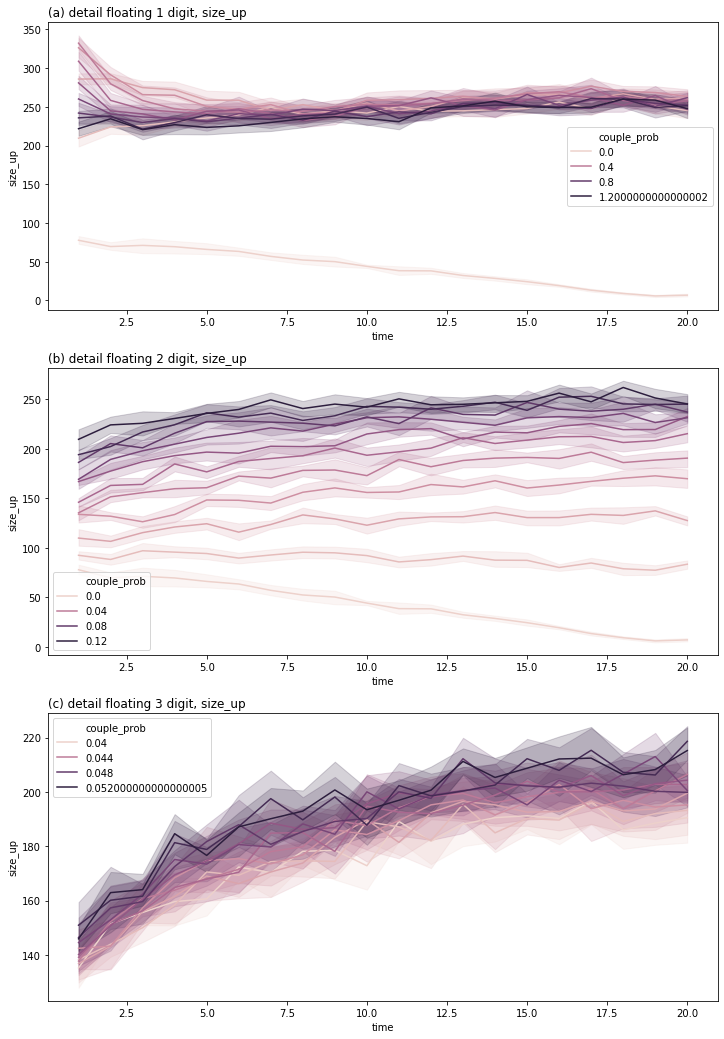

In [39]:
fig, axs = plt.subplots(3, 1, figsize=(12,18))

col = 'size_up'

sns.lineplot(x='time', y=col, hue='couple_prob', data=df_couple[1], ax=axs[0])
axs[0].set_title('(a) detail floating 1 digit, {}'.format(col), loc='left')
sns.lineplot(x='time', y=col, hue='couple_prob', data=df_couple[2], ax=axs[1])
axs[1].set_title('(b) detail floating 2 digit, {}'.format(col), loc='left')
sns.lineplot(x='time', y=col, hue='couple_prob', data=df_couple[3], ax=axs[2])
axs[2].set_title('(c) detail floating 3 digit, {}'.format(col), loc='left')

Text(0.0, 1.0, '(c) detail floating 3 digit, size_down')

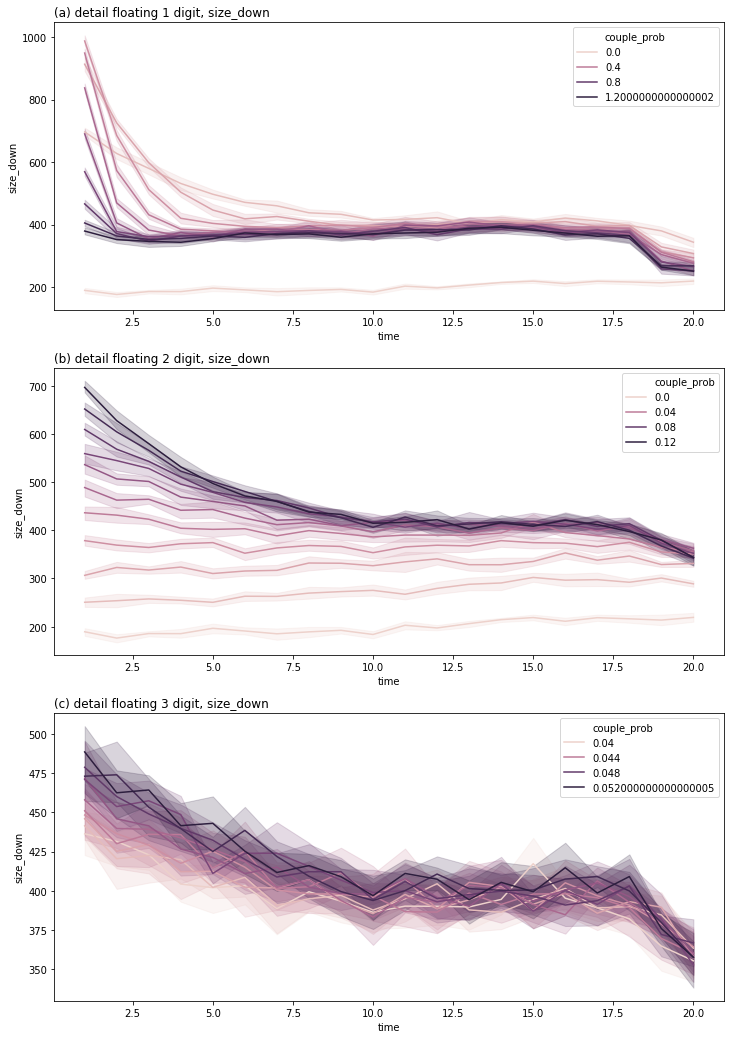

In [40]:
fig, axs = plt.subplots(3, 1, figsize=(12,18))

col = 'size_down'

sns.lineplot(x='time', y=col, hue='couple_prob', data=df_couple[1], ax=axs[0])
axs[0].set_title('(a) detail floating 1 digit, {}'.format(col), loc='left')
sns.lineplot(x='time', y=col, hue='couple_prob', data=df_couple[2], ax=axs[1])
axs[1].set_title('(b) detail floating 2 digit, {}'.format(col), loc='left')
sns.lineplot(x='time', y=col, hue='couple_prob', data=df_couple[3], ax=axs[2])
axs[2].set_title('(c) detail floating 3 digit, {}'.format(col), loc='left')

Text(0.0, 1.0, '(c) detail floating 3 digit, new_household')

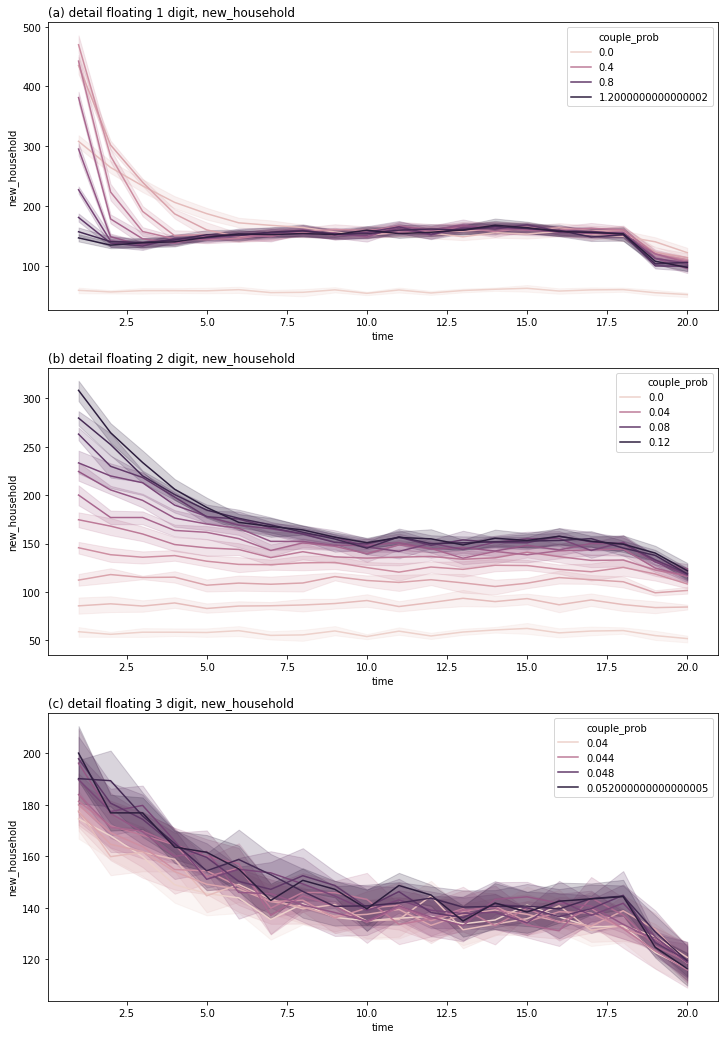

In [41]:
fig, axs = plt.subplots(3, 1, figsize=(12,18))

col = 'new_household'

sns.lineplot(x='time', y=col, hue='couple_prob', data=df_couple[1], ax=axs[0])
axs[0].set_title('(a) detail floating 1 digit, {}'.format(col), loc='left')
sns.lineplot(x='time', y=col, hue='couple_prob', data=df_couple[2], ax=axs[1])
axs[1].set_title('(b) detail floating 2 digit, {}'.format(col), loc='left')
sns.lineplot(x='time', y=col, hue='couple_prob', data=df_couple[3], ax=axs[2])
axs[2].set_title('(c) detail floating 3 digit, {}'.format(col), loc='left')

In [43]:
for dd, df in df_couple.items():
    df['total_changes'] = df['size_up']+df['size_down']+df['new_household']
    

Text(0.0, 1.0, '(c) detail floating 3 digit, total_changes')

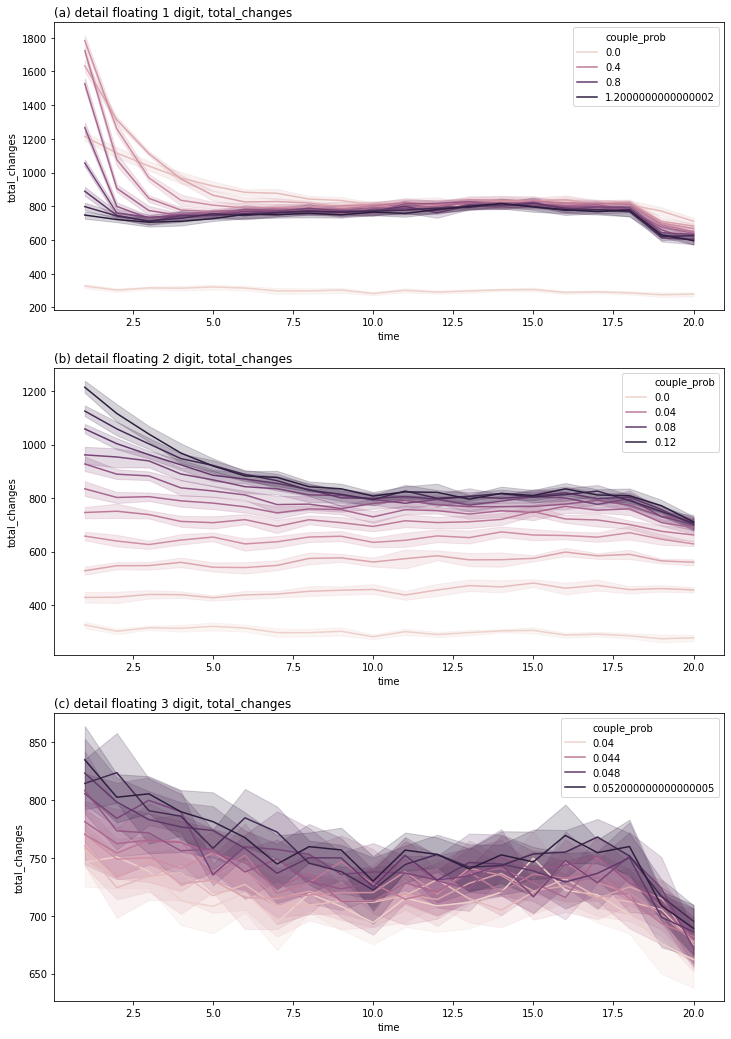

In [44]:


fig, axs = plt.subplots(3, 1, figsize=(12,18))

col = 'total_changes'

sns.lineplot(x='time', y=col, hue='couple_prob', data=df_couple[1], ax=axs[0])
axs[0].set_title('(a) detail floating 1 digit, {}'.format(col), loc='left')
sns.lineplot(x='time', y=col, hue='couple_prob', data=df_couple[2], ax=axs[1])
axs[1].set_title('(b) detail floating 2 digit, {}'.format(col), loc='left')
sns.lineplot(x='time', y=col, hue='couple_prob', data=df_couple[3], ax=axs[2])
axs[2].set_title('(c) detail floating 3 digit, {}'.format(col), loc='left')